Examples for:
Hold, C., Gamper, H., Pulkki, V., Raghuvanshi, N., & Tashev, I. J. (2019).
Improving Binaural Ambisonics Decoding by Spherical Harmonics Domain
Tapering and Coloration Compensation.
In IEEE International Conference on Acoustics, Speech and Signal Processing.

In [1]:
import numpy as np
from scipy.signal import firwin2

from spaudiopy import sph, utils, plot
from spaudiopy import process as pcs

In [2]:
# sampling rate (Hz)
fs = 48000
# evaluated frequencies, 1000 points
f = np.linspace(0, fs / 2, 1000)
# target spherical harmonics order N (>= 3)
N = 5

In [3]:
# tapering windows
w_Hann = pcs.half_sided_Hann(N)
w_rE = sph.max_rE_weights(N)
# Choose here:
w_taper = w_Hann

w_taper = sph.unity_gain(w_taper)

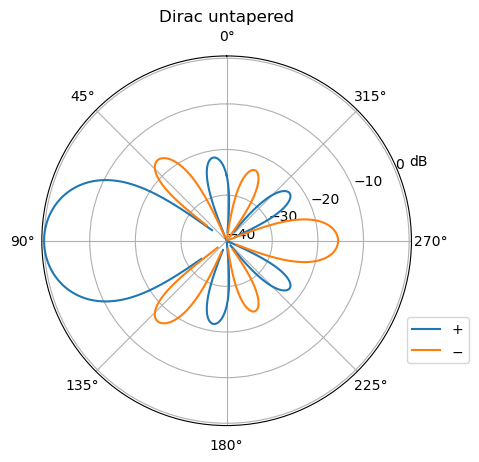

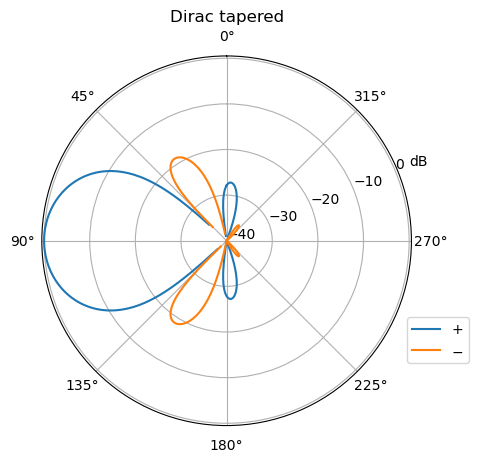

In [4]:
# %% Spatial dirac in SH domain
dirac_azi = np.deg2rad(90)
dirac_zen = np.deg2rad(90)

# cross section
azi = np.linspace(0, 2 * np.pi, 720, endpoint=True)
zen = np.pi / 2 * np.ones_like(azi)

# Bandlimited Dirac pulse
dirac_untapered = 4 * np.pi / (N + 1) ** 2 * \
                  sph.bandlimited_dirac(N, azi - dirac_azi)
dirac_tapered = sph.bandlimited_dirac(N, azi - dirac_azi, w_n=w_taper)
plot.polar(azi, dirac_untapered, title='Dirac untapered')
plot.polar(azi, dirac_tapered, title='Dirac tapered')

/home/chris/git/spaudiopy/spaudiopy/sph.py:843: RuntimeWarning: invalid value encountered in divide
  (scyspecial.spherical_jn(n, kr, True) /


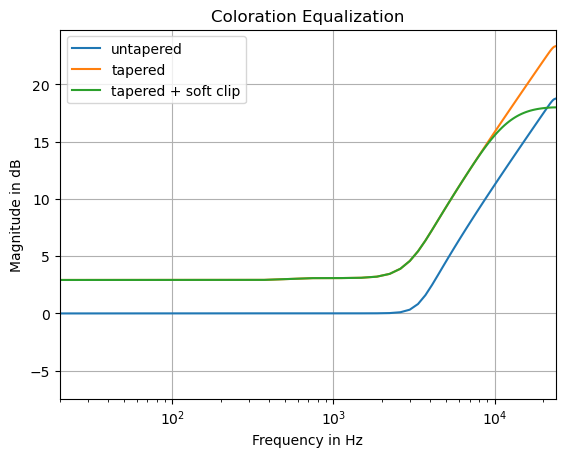

In [5]:
# Coloration compensation of windowing
compensation_untapered = sph.binaural_coloration_compensation(N, f)
compensation_tapered = sph.binaural_coloration_compensation(N, f,
                                                            w_taper=w_taper)
compensation_tapered_lim = pcs.gain_clipping(compensation_tapered,
                                             utils.from_db(12))
# Get an FIR filter
ntaps = 128 + 1
assert (ntaps % 2), "Does not produce uneven number of filter taps."
filter_taps_untapered = firwin2(ntaps, f / (fs // 2), compensation_untapered)
filter_taps_tapered = firwin2(ntaps, f / (fs // 2), compensation_tapered)
filter_taps_tapered_lim = firwin2(ntaps, f / (fs // 2),
                                  compensation_tapered_lim)
# Now you can save the filter taps, e.g. as a wav file...

# Plot their spectra
plot.spectrum([filter_taps_untapered, filter_taps_tapered,
                filter_taps_tapered_lim], fs, scale_mag=True,
               title='Coloration Equalization',
               labels=['untapered', 'tapered', 'tapered + soft clip'])